In [1]:
# Start writing code here...


In [2]:
# imports
## general imports
%matplotlib inline
import numpy as np

## local imports
from src.ea import EA
from src.L_system import LSystem
from src.turtle import plot_coords, branching_turtle_to_coords
from src.utils import turn_coords_to_numpy


#### steps for for a main run
(structure taken from slide 13, lecture 1)
-  initialize the population with candidate L-Systems
- pass the system(s) to the EA
    - evaluate the quality of each candidate
    - repeat until termination condition is satisfied:
        - select candidate solutions for reproduction
        - mutate the resulting candidates
        - evaluate new candidates
        - select candidates for the next generation


turtle FFFFFFFFFFFFFFFF[+FFFFFFFF[+FFFF[+FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]FFFF-[FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]--FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]][---FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]FFFFFFFF-[FFFF[+FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]FFFF-[FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]--FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]][---FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]]]--FFFF[+FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A][---A]][---F[+AF-[A]--A][---A]]FFFF-[FF[+F[+AF-[A]--A][---A]FF-[F[+AF-[A]--A][---A]]--F[+AF-[A]--A

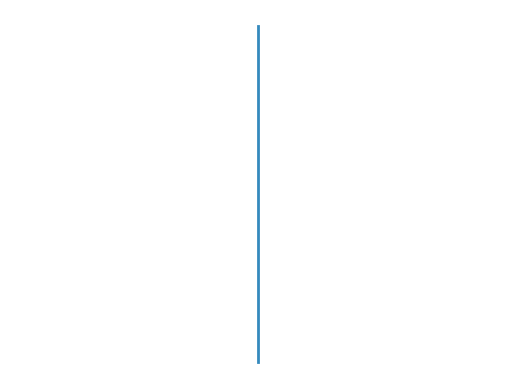

In [4]:


#goal parameters

axiom = 'A'
transformations = {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'} 
iterations = 5
angle = 22.5
goal_system = LSystem(axiom, transformations)
goal_system.transform_multiple(iterations)
goal_program = goal_system.sequence
coords_g = branching_turtle_to_coords(goal_program, angle)
X,Y = zip(*coords_g)
goal_nump = turn_coords_to_numpy(X,Y)
#ensure that it is not RGB anymore 
goal_img =  np.reshape(goal_nump[:,:,0],(480,640,1))


def run(axiom='A', rules={'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, iterations=5, angle=22.5):
    # init L-system
    system_zero = LSystem(axiom, rules) # TODO: make a instance of an l-system with the parameters above

    # pass to EA
    ea = EA(system_zero, goal_img)
    turtles = ea.runEvolutions(iterations)
    #best = turtles.getBest(1)
    best = turtles[0].sequence

    # show results
    coords = branching_turtle_to_coords(best, angle)
    plot_coords(coords, bare_plot=True) # bare_plot removes the axis labels

run()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=48486dc9-a1a6-4dac-ab77-4156e0b947fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>